In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import BarycentricInterpolator
import pandas as pd
import array_to_latex as a2l
from decimal import Decimal

POPULATION = np.array([
    76_212_168, 
    92_228_496, 
    106_021_537, 
    123_202_624, 
    132_164_569, 
    151_325_798, 
    179_323_175, 
    203_302_031, 
    226_542_199
])

YEARS = np.array([
    1900, 
    1910, 
    1920, 
    1930, 
    1940, 
    1950, 
    1960, 
    1970, 
    1980
])

##### Tworzenie funkcji bazowych

In [2]:
phi_1 = YEARS
phi_2 = (YEARS - 1900)
phi_3 = (YEARS - 1940)
phi_4 = ((YEARS - 1940)/40)

##### a)
Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vandermonde’a.

In [3]:
def vandermonde_matrix(t):
    return np.vander(t, increasing=False)


##### b)
Oblicz współczynnik uwarunkowania każdej z powyższch macierzy, używając funkcji ```numpy.linalg.cond```.

In [4]:
def condition_number(A):
    return np.linalg.cond(A)

df = pd.DataFrame({
    "Współczynnik uwarunkowania" : [
        condition_number(vandermonde_matrix(phi_1)), 
        condition_number(vandermonde_matrix(phi_2)), 
        condition_number(vandermonde_matrix(phi_3)), 
        condition_number(vandermonde_matrix(phi_4))
    ]
}).style.relabel_index(["1","2","3","4"])

df

,Współczynnik uwarunkowania
1,607418337636781.250000
2,3895611382.111330
3,2095697677.553826
4,1605.443700


##### c)
Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczynniki wielomianu interpolacyjnego dla danych z zadania. Narysuj wielomian interpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale [1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresie umieść także węzły interpolacji.

In [5]:
# Współczynniki wielomianu interpolacyjnego

def interpolating_polynomial(t, b=POPULATION):
    A = vandermonde_matrix(t)
    x = np.linalg.solve(A, b)
    return x

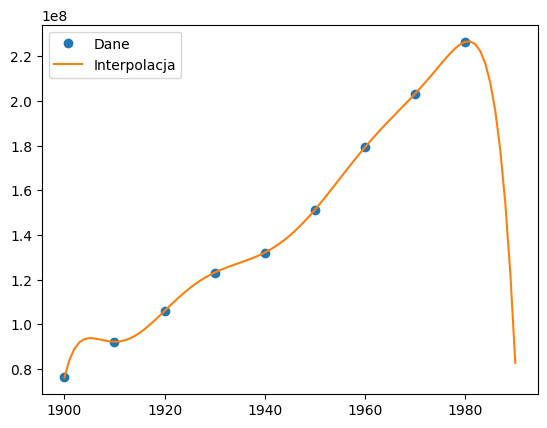

In [6]:
# Wykres

t = np.arange(1900, 1991, 1)
y = np.polyval(interpolating_polynomial(phi_4), (t-1940)/40)

plt.plot(YEARS, POPULATION, 'o', label='Dane')
plt.plot(t, y, label='Interpolacja')
plt.legend()
plt.show()

##### d)
Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990, wynoszącą 248 709 873. Ile wynosi błąd względny ekstrapolacji dla roku 1990?

In [7]:
#Błąd Względny

population1990 = np.polyval(interpolating_polynomial(phi_4), 1990)
print(population1990)
error = abs((population1990 - 248709873) / 248709873)
print(f"Błąd względny ekstrapolacji dla roku 1990: {error}")


-7.749119639100881e+34
Błąd względny ekstrapolacji dla roku 1990: 3.1157265876215864e+26


##### e)
Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów interpolacji podanych w zadaniu. Oblicz wartości wielomianu w odstępach jednorocznych.

In [8]:
lagrange_polynomial = lagrange(phi_4, POPULATION)

# Obliczanie wartości wielomianu Lagrange'a dla Phi4 w odstępach jednorocznych
y_lagrange = lagrange_polynomial((t-1940)/40)


##### f)
Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych węzłów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.

In [9]:

# Obliczanie wielomianu interpolacyjnego Newtona dla Phi4
newton_polynomial = BarycentricInterpolator(phi_4, POPULATION)

# Obliczanie wartości wielomianu Newtona dla Phi4 w odstępach jednorocznych
y_newton = newton_polynomial((t-1940)/40)

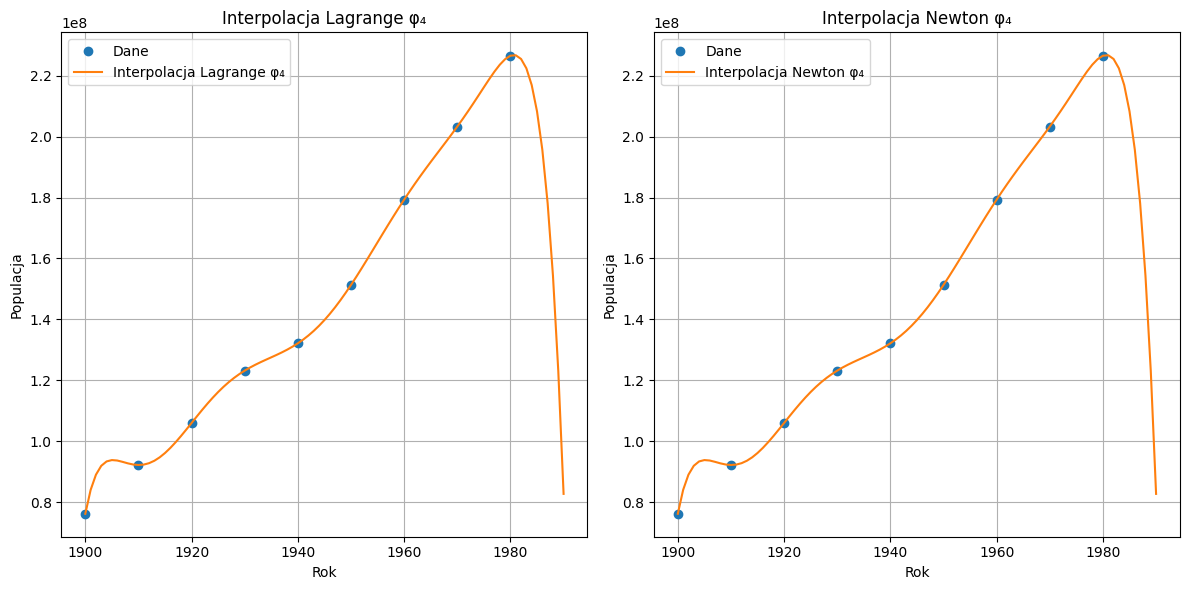

In [10]:
# Wykresy dla interpolacji Lagrange'a i Newtona dla Phi4
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(YEARS, POPULATION, 'o', label='Dane')
plt.plot(t, y_lagrange, label='Interpolacja Lagrange \u03C6\u2084')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Lagrange \u03C6\u2084')
plt.grid(True)

# Wykres dla interpolacji Newtona dla Phi4
plt.subplot(1, 2, 2)
plt.plot(YEARS, POPULATION, 'o', label='Dane')
plt.plot(t, y_newton, label='Interpolacja Newton \u03C6\u2084')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Newton \u03C6\u2084')
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
# To samo ale z własnoręcznie napisanymi funkcjami
# Wielomian interpolacyjny Lagrange'a dla Phi4

def lagrange_interpolation(x, y, t):
    n = len(x)
    L = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l *= (t - x[j]) / (x[i] - x[j])
        L += y[i] * l
    return L

y_lagrange_manual = lagrange_interpolation(phi_4, POPULATION, (t-1940)/40)


# Wielomian interpolacyjny Newtona dla Phi4

def newton_interpolation(x, y, t):
    n = len(x)
    a = y.copy()
    for i in range(1, n):
        a[i:] = (a[i:] - a[i-1:-1]) / (x[i:] - x[:-i])
    N = a[-1]
    for i in range(n-2, -1, -1):
        N = a[i] + (t - x[i]) * N
    return N

y_newton_manual = newton_interpolation(phi_4, POPULATION, (t-1940)/40)

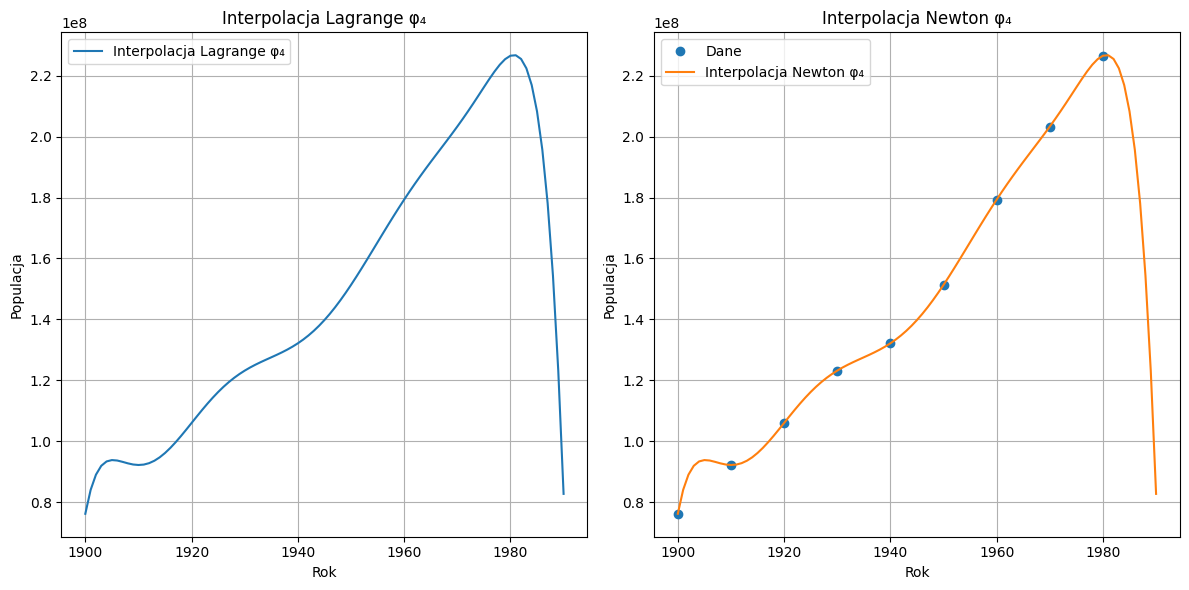

In [14]:
# Wykresy dla interpolacji Lagrange'a dla Phi4

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(YEARS, POPULATION, 'o', label='Dane')
plt.plot(t, y_lagrange_manual, label='Interpolacja Lagrange \u03C6\u2084')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Lagrange \u03C6\u2084')
plt.grid(True)

# Wykres dla interpolacji Newtona dla Phi4
plt.subplot(1, 2, 2)
plt.plot(YEARS, POPULATION, 'o', label='Dane')
plt.plot(t, y_newton_manual, label='Interpolacja Newton \u03C6\u2084')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Newton \u03C6\u2084')
plt.grid(True)

plt.tight_layout()
plt.show()


##### g)
Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takich danych wyznacz wielomian interpolacyjny ósmego stopnia, używając najlepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współczynniki z współczynnikami obliczonymi w podpunkcie (c). Wyjaśnij otrzymany wynik.

In [13]:
rounded_population = np.round(POPULATION, decimals=-6)

df = pd.DataFrame({
    "Współczynniki wielomianu" : [interpolating_polynomial(phi_4, rounded_population), interpolating_polynomial(phi_4, POPULATION)]
}).style.relabel_index(["po zaokręgleniu","przed zaokrągleniem"])

display(df)

,Współczynniki wielomianu
po zaokręgleniu,[-2.94196825e+08 1.86920635e+08 5.70311111e+08 -3.38488889e+08 -3.56755556e+08 1.81111111e+08 1.00141270e+08 4.59571429e+07 1.32000000e+08]
przed zaokrągleniem,[-3.15180235e+08 1.89175576e+08 6.06291250e+08 -3.42668456e+08 -3.74614715e+08 1.82527130e+08 1.02716315e+08 4.61307656e+07 1.32164569e+08]
